# Active Subspace Analysis Notebook for ICS Simulations with a Three-Reaction Mechanism

**DESCRIPTION**

This data set comes from a numerical simulation of an in-situ combustion (ICS) process for oil recovery. The combustion process uses a chemical mechanism with three reactions. The input variables are the activation energies of the three reactions. The outputs include the cumulative oil, water, CO, and CO2 at the production well. Another quantity of interest is the average velocity of the front measured by tracking the location of the maximum temperature. 

**INPUTS (3)**

Variable | Lower bound | Upper bound | Density
--- | --- | --- | ---
Activation Energy 1 | 18048 | 27072 | Uniform
Activation Energy 2 | 54020 | 81030 | Uniform
Activation Energy 3 | 70060 | 105090 | Uniform

**OUTPUTS (5)**

Variable | Description
--- | --- 
OIL | Cumulative oil production
WATER | Cumulative water production
CO | Cumulative CO production
CO2 | Cumulative CO2 production
VEL | Average front velocity

**REFERENCES**

+ Folake's MS Thesis (reference?)
+ Constantine, Dow, and Wang. [Active Subspace Methods in Theory and Practice: Applications to Kriging Surfaces](http://epubs.siam.org/doi/abs/10.1137/130916138)

**CONTACT**

Questions or comments? Contact [Paul Constantine](mailto:pconstan@mines.edu)


In [1]:
import numpy as np
import pandas as pn
import active_subspaces as ac
%matplotlib inline

Import the data set, distinguish inputs (X) and outputs (F), and set the labels.

In [2]:
df = pn.DataFrame.from_csv('ICS-3reac.txt')
data = df.as_matrix()
X = data[:,:3]
F = data[:,3:]
M,m = X.shape
labels = df.keys()
in_labels = labels[:3]
out_labels = labels[3:]

Normalize the inputs to the interval [-1,1].

In [3]:
xl = np.array([18048.0,54020.0,70060.0])
xu = np.array([27072.0,81030.0,105090.0])
XX = ac.utils.misc.BoundedNormalizer(xl,xu).normalize(X)

Choose the output of interest. The out_index variable chooses amongst the five outputs of interest.

In [4]:
out_index = 1 # in the range [0,4]
f = F[:,out_index]
out_label = out_labels[out_index]

Run the check with the linear model.

In [5]:
#w,w_boot = ac.linear_model_check(XX,f)
ss = ac.subspaces.Subspaces()
ss.compute(f=f[:,np.newaxis],X=XX,sstype=5,nboot=200)

Display the one-dimensional sufficient summary plot.

/home/ryhoward/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


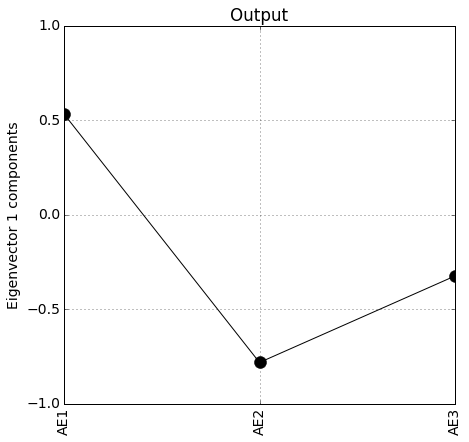

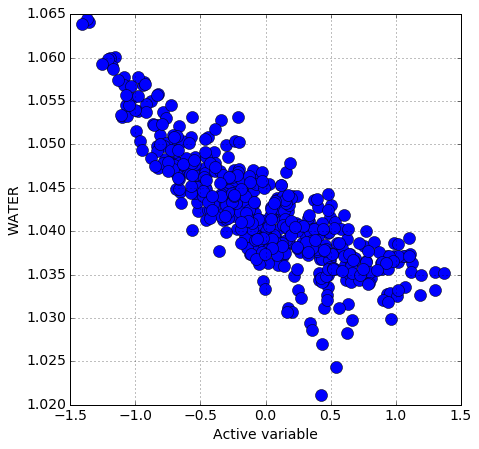

In [6]:
y = np.dot(XX,ss.W1) # active variables
ac.utils.plotters.eigenvectors(ss.W1,in_labels=in_labels)
ac.utils.plotters.sufficient_summary(y,f,out_label=out_label)

Get the active subspace using approximate gradients from local linear models. 

In [7]:
G = ac.local_linear_gradients(XX,f)
ass = ac.subspaces.Subspaces()
ass.compute(df=G,nboot=2000)

Plot active subspace components.

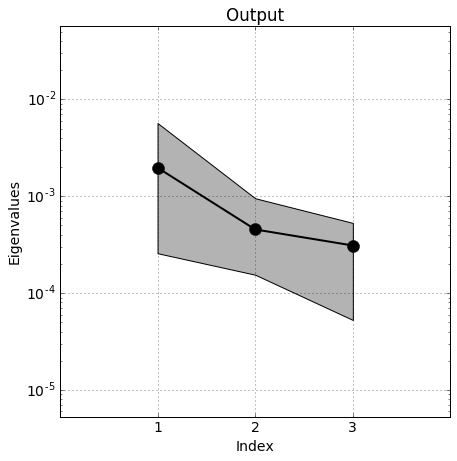

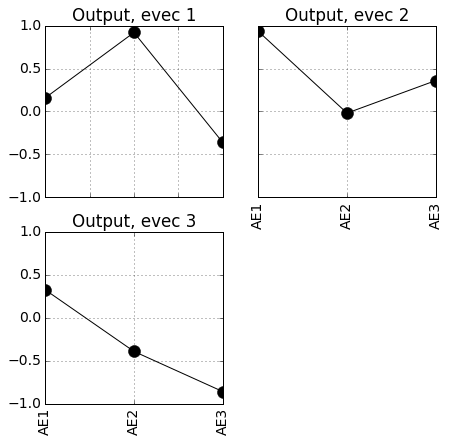

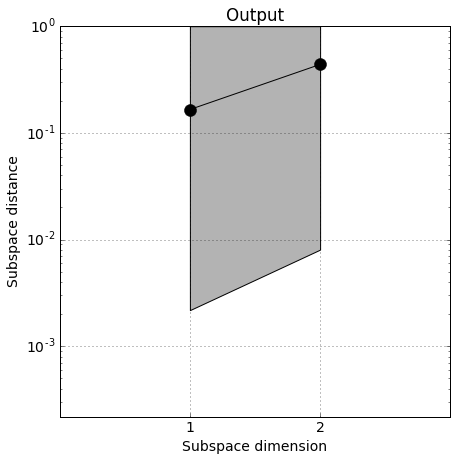

In [8]:
ac.utils.plotters.eigenvalues(ass.eigenvalues,ass.e_br)
ac.utils.plotters.eigenvectors(np.hstack((ass.W1,ass.W2)),in_labels=in_labels)
ac.utils.plotters.subspace_errors(ass.sub_br)

Make sufficient summary plots. 

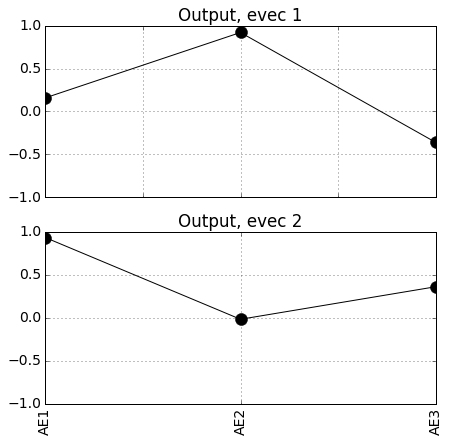

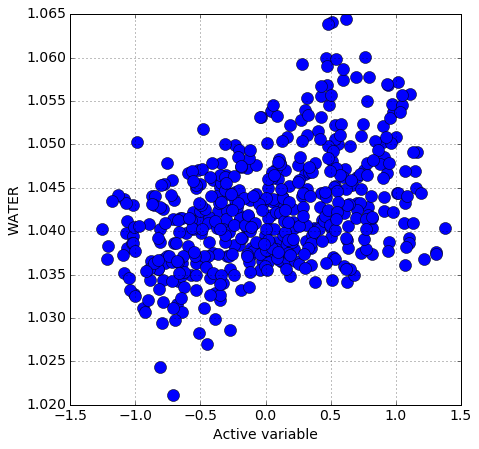

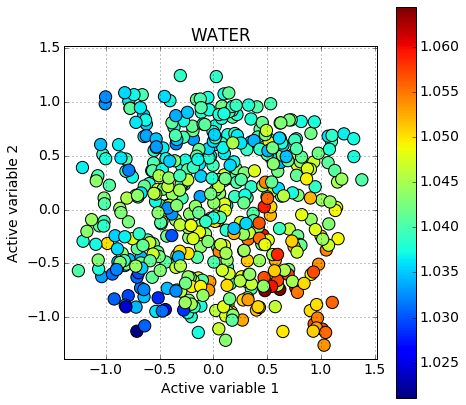

In [9]:
ass.partition(2)
y = np.dot(XX,ass.W1) # active variables
ac.utils.plotters.eigenvectors(ass.W1,in_labels=in_labels)
ac.utils.plotters.sufficient_summary(y,f,out_label=out_label)